# Monte-Carlo Simulation

## 1.1 Data Creation and Visualization

### Inverse Transform Sampling
Objective: Generate X values which are distributed according to an given distribution
    

0. Build integral (borders 0 to x) to covert pdf (probability distribution function = $f(x)$) to cdf (cummulative distribution function = $F(x)$).<br>
1. Generate random number u from the standard unifrom distribution in the interval [0,1] <br>
2. Find the inverse of the function $F_x$ -> to perfrom Inversion solve $F(X = F^{-1}(u)) = u$ <br>
3. Compute $X = F^{-1}(u)$. The computed variable C has distribution $F_x(x)$. <br>

### Transformation formulars for likelihoods
pdf for likelihoods: <br>
 <br>
$P(X=x|Y=0) = f(x) = 2-2x$  <br>
$F(x) = 2x-x^2$    <br>
$F^{-1}(x) = 1- \sqrt{1 - x}$

$P(X=x|Y=1) = f(x) = 2x  $<br>
$F(x) = x^2 $ <br>
$F^{-1}(x) = \sqrt{x}$    


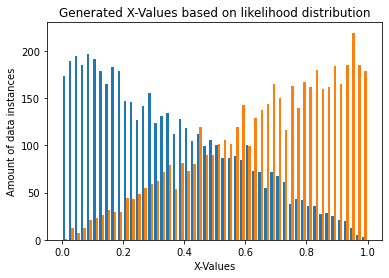

array([[0.30656558, 0.24680725, 0.47208733, ..., 0.77779433, 0.70613628,
        0.43780075],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def create_data(N):
    u = np.random.random(N // 2)
    z = np.random.random(N//2)

    y0 = np.zeros(N // 2)
    y1 = np.ones(N // 2)

    # "Inverse Transform Sampling" with generated random numbers
    x0 = 1 - np.sqrt(1 - u)
    x1 = np.sqrt(z)

    x_y0 = np.array([x0, y0])
    x_y1 = np.array([x1, y1])

    x_y = np.concatenate((x_y0, x_y1), axis=1)

    # comment this out to prevent a "plotoverflow" 
    
    plt.hist((x0, x1), bins=50)
    plt.title("Generated X-Values based on likelihood distribution",fontsize=12)
    plt.xlabel("X-Values")
    plt.ylabel("Amount of data instances")
    plt.show()

    return x_y

create_data(10000)

## 1.2 Classification by Thresholding


In [19]:
def verify_error():
    m_values = [10, 100, 1000, 10000]
    t_values = [0.2, 0.5, 0.6]
    mean_error_list = []

    for t in t_values:
        for m in m_values:
            for x in range(10):
                x_y = create_data(m)
                x = x_y[0]
                y = x_y[1]

                # check first expression, True = 1
                classifier_1 = (x >= t)
                
                # compares classifier with True label, if not equal there's an error detected
                error = np.sum(classifier_1 != y) / m 

                mean_error_list.append(error)

            mean_error = np.mean(mean_error_list)
            std_error = np.std(mean_error_list)

            print("N: " + str(m) + " Threshold: " + str(t) + " Mean: " + str(mean_error) + "  std: " + str(std_error))

            mean_error_list = []

            
verify_error()

N: 10 Threshold: 0.2 Mean: 0.29999999999999993  std: 0.1414213562373095
N: 100 Threshold: 0.2 Mean: 0.334  std: 0.026153393661244046
N: 1000 Threshold: 0.2 Mean: 0.33930000000000005  std: 0.009899999999999989
N: 10000 Threshold: 0.2 Mean: 0.34095000000000003  std: 0.0020543855529086994
N: 10 Threshold: 0.5 Mean: 0.28  std: 0.14696938456699069
N: 100 Threshold: 0.5 Mean: 0.263  std: 0.032878564445547195
N: 1000 Threshold: 0.5 Mean: 0.2538  std: 0.011754148203932098
N: 10000 Threshold: 0.5 Mean: 0.25017999999999996  std: 0.0030717421766808454
N: 10 Threshold: 0.6 Mean: 0.26  std: 0.14282856857085702
N: 100 Threshold: 0.6 Mean: 0.26800000000000007  std: 0.014696938456699072
N: 1000 Threshold: 0.6 Mean: 0.2619  std: 0.009491575211733834
N: 10000 Threshold: 0.6 Mean: 0.25959000000000004  std: 0.003343187102152674


As we can see the error standard deviation decreases logarithmically  with increasing M (converges to zero).<br>
See e.g. Rule C (1.3)


## 1.3 Baseline Classifier
### Rule C

N: 10 ProbabilityClassifier, Mean: 0.5199999999999999  std: 0.132664991614216
N: 100 ProbabilityClassifier, Mean: 0.4960000000000001  std: 0.05043808085167396
N: 1000 ProbabilityClassifier, Mean: 0.4918  std: 0.011847362575695918
N: 10000 ProbabilityClassifier, Mean: 0.49756  std: 0.0050618573666194894




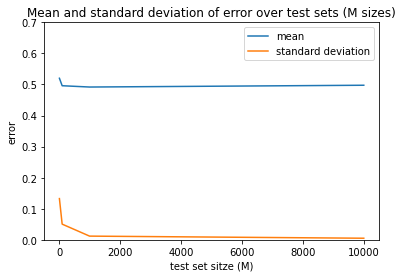

In [48]:
def probability_classifier():
    m_values = [10, 100, 1000, 10000]
    mean_error_list = []
    meanerror_plotlist = []
    stderror_plotlist = []

    for m in m_values:
        oneArray = np.ones(m // 2)
        zeroArray = np.zeros(m // 2)
        
        # probability array exists half of 1 and half of 0 values
        probability_array = np.concatenate((oneArray, zeroArray))

        for x in range(10):
            x_y = create_data(m)
            x = x_y[0]  
            y = x_y[1]
            
            np.random.shuffle(probability_array)

            error = np.sum(probability_array != y) / m

            mean_error_list.append(error)

        mean_error = np.mean(mean_error_list)
        std_error = np.std(mean_error_list)

        meanerror_plotlist.append(mean_error)  # mean_error from the datasets N:[10,100,..]
        stderror_plotlist.append(std_error)  # std_error from the mean error of the datasets

        print("N: " + str(m) + " ProbabilityClassifier, Mean: " + str(mean_error) + "  std: " + str(std_error))

        mean_error_list = []
        
    print(str("\n"))
    
    plt.plot(m_values, meanerror_plotlist)
    plt.plot(m_values, stderror_plotlist)
    plt.title("Mean and standard deviation of error over test sets (M sizes)",fontsize = 12)
    plt.ylim(0.0,0.7)
    plt.ylabel("error")
    plt.xlabel("test set sitze (M)")
    plt.legend(["mean","standard deviation"])
    plt.show()
    
probability_classifier()

### Rule D

N: 10 ProbabilityClassifier, Mean: 0.5  std: 0.0
N: 100 ProbabilityClassifier, Mean: 0.5  std: 0.0
N: 1000 ProbabilityClassifier, Mean: 0.5  std: 0.0
N: 10000 ProbabilityClassifier, Mean: 0.5  std: 0.0




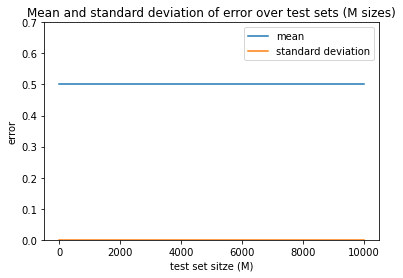

In [51]:
def always_predict_1_classifier():
    m_values = [10, 100, 1000, 10000]
    mean_error_list = []
    meanerror_plotlist = []
    stderror_plotlist = []

    for m in m_values:
        for x in range(10):
            x_y = create_data(m)
            x = x_y[0] 
            y = x_y[1]

            ones_array = np.ones(m)
            error = np.sum(ones_array != y) / m

            mean_error_list.append(error)

        mean_error = np.mean(mean_error_list)
        std_error = np.std(mean_error_list)

        meanerror_plotlist.append(mean_error)  # mean_error from the datasets N:[10,100,..]
        stderror_plotlist.append(std_error)  # std_error from the mean error of the datasets

        print("N: " + str(m) + " ProbabilityClassifier, Mean: " + str(mean_error) + "  std: " + str(std_error))

        mean_error_list = []

    print(str("\n"))
    
    plt.plot(m_values, meanerror_plotlist)
    plt.plot(m_values, stderror_plotlist)
    plt.title("Mean and standard deviation of error over test sets (M sizes)",fontsize = 12)
    plt.ylim(0.0,0.7)
    plt.ylabel("error")
    plt.xlabel("test set sitze (M)")
    plt.legend(["mean","standard deviation"])
    plt.show()
    
always_predict_1_classifier()

## 1.4 Nearest Nieghbour Classifier

In [62]:
def nearest_neighbour_classifier():
    _n = [2, 100]
    error_list = []
    count_of_datasets = 10000

    for n in _n:
        test_data = create_data(count_of_datasets)
        for i in range(100):
            training_data = create_data(n)
            
            # euclidean distance
            # returns distance from point of test_data to different points of training_data in separate columns
            distance = test_data[0] - training_data[0][:, np.newaxis]

            # transpose array (make columns to row) and make all element-values absolute
            distance = np.absolute(np.transpose(distance))

            # index of row Arrays for min value
            index = np.argmin(distance, axis=1)

            # choose predicted Y
            predicted_y = training_data[1][index]

            error = np.sum(predicted_y != test_data[1]) / count_of_datasets
            error_list.append(error)

        error_mean = np.mean(error_list)
        error_std = np.std(error_list)
        print("N: "+str(n)+"  errormean: "+str(error_mean)+"  errorstd: "+str(error_std))

nearest_neighbour_classifier()

N: 2  errormean: 0.355729  errorstd: 0.16750408729043
N: 100  errormean: 0.3425455  errorstd: 0.12039439305777491


As in the case of thresholds classifiers the mean error decreases with increasing training sets. <br>
(from 35% to 25%. (-> optimal Bayes))